In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 加载训练数据

In [2]:
x = pd.read_csv('logistic_x.txt',sep='\ +',header=None,engine='python')
y = pd.read_csv('logistic_y.txt',sep='\ +',header=None,engine='python')
y = y.astype(int)
x['label'] = y[0].values
type(x)

pandas.core.frame.DataFrame

In [3]:
#99个样本，每个样本两个属性，对应一个标签
# print(x)
# print(y)

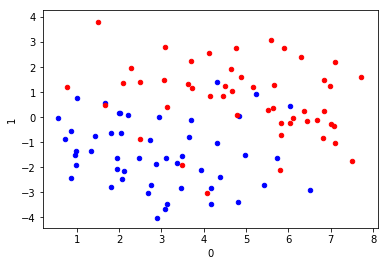

In [4]:
#查看数据的分布
ax = plt.axes()
x.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
x.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

In [5]:
#把数据从pandas框架格式转成numpy的ndarray以供计算
gt_x = x[[0,1]].values
gt_x = np.hstack([np.ones((gt_x.shape[0],1)),gt_x])
gt_y = x['label'].values
gt_y = gt_y.reshape(-1,1)#把y转换成和x一样的ndarray，且以列的形式排列
# print(gt_x)
# print(gt_y)
# gt_y.shape

### 梯度下降法求解

In [22]:
class LGR_GD():
    def __init__(self):
        self.m = None
        self.w = None
    
    def init_detail(self,x):
        [m,d] = np.shape(x)#m是样本个数，d是特征个数
        self.m = m
        self.w = np.zeros((1,d))#w的维度应该对应特征个数
            
    def sigmoid(self,x):
        wtx =  np.dot(x,self.w.T)#嵌套的线性模型的y值
        h_w = 1/(1 + np.exp(-wtx))
        return h_w   
        
    def loss(self,x,y):
        loss = 0
        h_w = self.sigmoid(x)
        loss = np.dot(y.T,np.log(h_w)) + np.dot((1-y).T,np.log(1-h_w))
        loss = -np.sum(loss)/self.m
        return loss
    
    def cal_gradient(self,x,y,lr):
        d = self.w.shape[1]
        dw = np.zeros((1,d))
        h_w = self.sigmoid(x)
        
        dw = np.dot((y-h_w).T,x)/self.m
        self.w = self.w - lr*dw
        
    
    def train(self,x,y,lr,max_iter):
        self.init_detail(x)
        for i in range(max_iter):
            self.cal_gradient(x,y,lr)
            loss = self.loss(x,y)
            print('loss:{}'.format(loss))
#         print("w:{}".format(self.w))

    def predict(self,x):
        y_pred = x.dot(self.w)
        return y_pred

In [23]:
lgr_gd = LGR_GD()
lgr_gd.train(gt_x,gt_y,0.001,5000)

loss:0.693687517197579
loss:0.6942303701843844
loss:0.6947757600860526
loss:0.6953237076517303
loss:0.6958742338153626
loss:0.6964273596970396
loss:0.6969831066043429
loss:0.6975414960336928
loss:0.698102549671697
loss:0.698666289396501
loss:0.6992327372791336
loss:0.6998019155848593
loss:0.7003738467745255
loss:0.7009485535059096
loss:0.7015260586350677
loss:0.7021063852176782
loss:0.7026895565103883
loss:0.7032755959721539
loss:0.7038645272655814
loss:0.704456374258264
loss:0.7050511610241175
loss:0.7056489118447102
loss:0.7062496512105925
loss:0.7068534038226185
loss:0.7074601945932688
loss:0.7080700486479615
loss:0.7086829913263651
loss:0.7092990481837014
loss:0.7099182449920439
loss:0.7105406077416099
loss:0.7111661626420464
loss:0.711794936123708
loss:0.7124269548389268
loss:0.7130622456632759
loss:0.7137008356968231
loss:0.714342752265375
loss:0.714988022921714
loss:0.7156366754468229
loss:0.7162887378510995
loss:0.7169442383755623
loss:0.7176032054930416
loss:0.7182656679093609

loss:5.864311816112397
loss:5.870574440697032
loss:5.87683734542146
loss:5.883100529257013
loss:5.8893639911796765
loss:5.895627730170057
loss:5.90189174521336
loss:5.908156035299377
loss:5.914420599422441
loss:5.920685436581422
loss:5.926950545779696
loss:5.933215926025115
loss:5.9394815763299995
loss:5.945747495711093
loss:5.9520136831895645
loss:5.958280137790965
loss:5.9645468585452175
loss:5.970813844486585
loss:5.977081094653657
loss:5.983348608089319
loss:5.989616383840735
loss:5.995884420959324
loss:6.002152718500736
loss:6.008421275524839
loss:6.014690091095685
loss:6.020959164281495
loss:6.0272284941546355
loss:6.033498079791597
loss:6.039767920272977
loss:6.046038014683456
loss:6.052308362111769
loss:6.058578961650702
loss:6.064849812397051
loss:6.071120913451617
loss:6.077392263919179
loss:6.083663862908467
loss:6.089935709532158
loss:6.096207802906844
loss:6.102480142153012
loss:6.108752726395026
loss:6.115025554761113
loss:6.121298626383328
loss:6.127571940397553
loss:6.1

loss:9.992746883243488
loss:9.999086170923075
loss:10.005425500320534
loss:10.0117648713359
loss:10.018104283869478
loss:10.024443737821855
loss:10.030783233093885
loss:10.037122769586711
loss:10.043462347201732
loss:10.049801965840636
loss:10.05614162540537
loss:10.06248132579816
loss:10.068821066921496
loss:10.07516084867814
loss:10.081500670971119
loss:10.087840533703734
loss:10.094180436779544
loss:10.100520380102378
loss:10.106860363576327
loss:10.11320038710575
loss:10.11954045059526
loss:10.125880553949743
loss:10.13222069707434
loss:10.138560879874445
loss:10.144901102255726
loss:10.151241364124102
loss:10.157581665385742
loss:10.163922005947082
loss:10.170262385714816
loss:10.17660280459588
loss:10.182943262497478
loss:10.189283759327054
loss:10.195624294992315
loss:10.201964869401216
loss:10.208305482461961
loss:10.214646134083004
loss:10.220986824173053
loss:10.227327552641059
loss:10.233668319396223
loss:10.24000912434799
loss:10.24634996740605
loss:10.252690848480345
loss:

loss:16.33679126817454
loss:16.34314719240647
loss:16.349503121463016
loss:16.355859055334378
loss:16.362214994010774
loss:16.368570937482435
loss:16.374926885739622
loss:16.381282838772613
loss:16.387638796571704
loss:16.393994759127207
loss:16.400350726429473
loss:16.406706698468856
loss:16.413062675235732
loss:16.419418656720506
loss:16.42577464291359
loss:16.432130633805432
loss:16.438486629386485
loss:16.444842629647233
loss:16.451198634578173
loss:16.457554644169825
loss:16.46391065841273
loss:16.47026667729744
loss:16.476622700814545
loss:16.482978728954635
loss:16.489334761708335
loss:16.495690799066274
loss:16.502046841019116
loss:16.50840288755754
loss:16.51475893867224
loss:16.521114994353933
loss:16.527471054593352
loss:16.533827119381254
loss:16.54018318870841
loss:16.54653926256562
loss:16.552895340943696
loss:16.55925142383347
loss:16.56560751122578
loss:16.57196360311152
loss:16.57831969948156
loss:16.58467580032682
loss:16.591031905638225
loss:16.597388015406718
loss:1

loss:22.694081749203413
loss:22.70043975893454
loss:22.706797769330734
loss:22.71315578039071
loss:22.719513792113176
loss:22.725871804496855
loss:22.73222981754047
loss:22.738587831242732
loss:22.744945845602377
loss:22.751303860618115
loss:22.757661876288704
loss:22.764019892612854
loss:22.7703779095893
loss:22.776735927216787
loss:22.78309394549405
loss:22.789451964419833
loss:22.79580998399288
loss:22.802168004211943
loss:22.80852602507576
loss:22.814884046583092
loss:22.821242068732698
loss:22.827600091523315
loss:22.833958114953724
loss:22.840316139022683
loss:22.846674163728938
loss:22.85303218907128
loss:22.859390215048457
loss:22.86574824165926
loss:22.872106268902446
loss:22.878464296776798
loss:22.884822325281096
loss:22.891180354414125
loss:22.897538384174663
loss:22.903896414561494
loss:22.91025444557341
loss:22.916612477209206
loss:22.922970509467667
loss:22.929328542347598
loss:22.935686575847782
loss:22.942044609967038
loss:22.94840264470415
loss:22.954760680057937
loss

loss:29.04592541427155
loss:29.05228371976731
loss:29.05864202536211
loss:29.065000331055753
loss:29.071358636848064
loss:29.077716942738846
loss:29.084075248727917
loss:29.090433554815096
loss:29.0967918610002
loss:29.10315016728304
loss:29.109508473663446
loss:29.11586678014122
loss:29.122225086716185
loss:29.128583393388155
loss:29.134941700156954
loss:29.141300007022405
loss:29.14765831398431
loss:29.1540166210425
loss:29.160374928196795
loss:29.166733235447012
loss:29.173091542792974
loss:29.179449850234494
loss:29.185808157771405
loss:29.192166465403513
loss:29.19852477313065
loss:29.20488308095264
loss:29.211241388869297
loss:29.217599696880445
loss:29.223958004985917
loss:29.230316313185522
loss:29.236674621479093
loss:29.24303292986645
loss:29.249391238347414
loss:29.255749546921816
loss:29.26210785558948
loss:29.26846616435023
loss:29.2748244732039
loss:29.281182782150296
loss:29.287541091189258
loss:29.293899400320615
loss:29.300257709544187
loss:29.306616018859792
loss:29.3

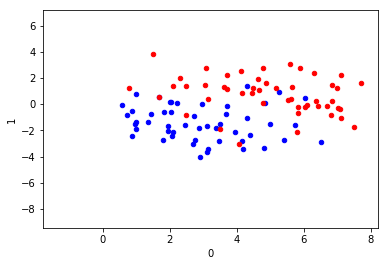

In [18]:
ax = plt.axes()

x.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
x.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

_xs = np.array([np.min(x[:,1]), np.max(x[:1])])
_ys = (lgr_gd.w[0][0] + lgr_gd.w[0][1] * _xs) / (- lgr_gd.w[0][2])
plt.plot(_xs, _ys, lw=1)

In [ ]:
[m,d] = np.shape(gt_x)#m样本数量，d特征个数
w = np.zeros((1,d))#w的维度应该对应特征个数
wtx = gt_x.dot(w.T)
# wtx =  np.dot(gt_x,w.T)
wtx.shape
h_w = 1/(1 + np.exp(-wtx))
h_w.shape
loss = np.dot(gt_y.T,np.log(h_w)) + np.dot((1-gt_y).T,np.log(1-h_w))
loss = -np.sum(loss)/m
loss

# dw = np.mean((y - h_w).T*gt_x,axis=0)
dww

In [ ]:
niu = np.zeros((1,5))
niu.shape[1]